# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 4, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Pablo Rodriguez Alves - 15310191
Nitai Nijholt - 12709018

# Exercise 1 (6 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from math import radians

data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$. Implement the Gauss-Newton method yourself. You may use linear algebra functions from `scipy` and `numpy`. Plot the datapoints and the curve fitted to the data in a semilogarithmic plot.

It is best if you define your function for Gauss-Newton separately from the definitions associated with the bacterial model.

### Answer



The Gauss Newton method can be used to solve non linear least squared problems.
This is done by using an initial guess for the form of the function, in this case $x_{1} \cdot x_{2}^{t}$ an initial guess for its coefficients $x_{k}$, and vector of data $y$ to which the function can be fitted using $K$ iterations of the Gauss Newton method.
First a residual vector is defined for $m$ datapoints:


$r_{i}(x)$ = $y_{i} -  f(t_{i}, x_1, x_2)$, $i = 1,...m, $


We wish to minimize the function $\phi(x) = \frac{1}{2} r(x)^{T} r(x)$ which is the sum of squared of residual components (Heath p. 284)

Thus the corresponding Jacobian of $\phi$ will be:

$J = \begin{bmatrix} -x_{2}^{t} \\ -x_{1} \cdot t \cdot x_{2}^{t} \end{bmatrix}$

Which we then use to solve for $sk$ in the least squares problem:

$J(x_k)s_k\cong-r(x_k)$

With this value for sk, we update the value for the coefficient vector $x_{k}$ iteratively:

$x_{k+1}=x_k+s_k$


Terminating at convergence or when max iterations are reached and returning the best coefficients found: $x_{K}$ These steps are obtained from Heath p.285


In [137]:
# helper functions


# setup a function with initial values of the form x_1*x_2**t
def func(t, xk):
    """provides the output of a function of form x_1*x_2**t at timestep t, where the coefficients x_1 and x_2 are passed as a tuple xk"""
    x_1_init, x_2_init = xk
    return x_1_init*x_2_init**t

# compute residual values
def residual(xk, func, data_to_fit):
    """Returns a residual vector of size len(data), based on a tuple of coefficients xk, a function func and a vector data_to_fit"""
    # create an empty residual vector of same size of data to fit
    residuals = np.zeros_like(data_to_fit)
    for index, value in enumerate(data_to_fit):
        residuals[index] = value - func(index, xk)
    return residuals

# define the Joacobian of the function
def Jacobian(xk, data_to_fit):
    """Returns Jacobian of size len(data) x vars, based on functional form x_1*x_2**t, where the coefficients x_1 and x_2 are passed as a tuple xk"""
    x_1_init, x_2_init = xk
    jacob = np.zeros((len(data_to_fit),2))
    for t in range(len(data_to_fit)):
        jacob[t,:] = np.array([-x_2_init**t,-x_1_init*t*x_2_init**(t-1)])
    return jacob

In [138]:
# define Gauss-Newton here
def GaussNewton(x0:tuple,  K:int, data_to_fit) -> tuple:
    """performs a Gauss Newton best fit and returns coefficients and residual vector"""
    xk = x0
    x_1_init, x_2_init = xk

    # perform iterations and find best fit xk
    for iter in range(K):

        # using QR solve for better numerical stability as mentioned in heath
        Q, R = np.linalg.qr((Jacobian(xk, data_to_fit)))
        sk = np.linalg.solve(R, np.dot(Q.T, -residual(xk, func, data_to_fit)))
        xk = xk + sk

    return xk, residual(xk, func, data_to_fit)

In [139]:
# make definitions for bacterial model and run Gauss-Newton here

# parameters
x0 = [0.19, 1.89]
K = 1000
data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14])

# getting coefficients and residuals
coefficients, residuals = GaussNewton(x0, K , data)
print('coefficients: ', coefficients)
print('residuals: ', residuals)


coefficients:  [0.28277059 1.74940289]
residuals:  [-0.09277059 -0.13467968 -0.17539406 -0.21392287 -0.14846104  0.06677461
  0.39462213 -0.17957145]


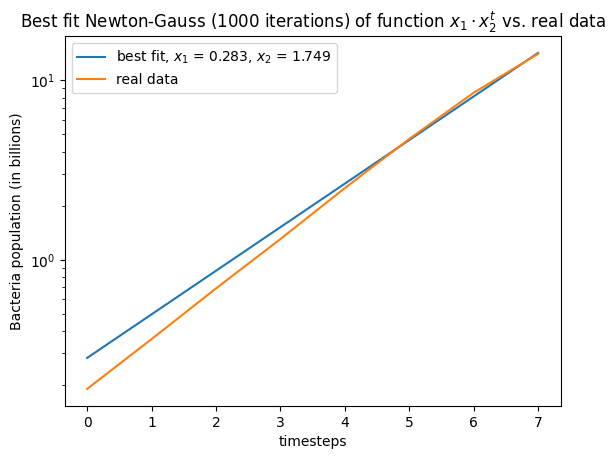

In [140]:
# plotting results

best_fit_estimate = [func(t, coefficients) for t in range(len(data))]
plt.title(r'Best fit Newton-Gauss (1000 iterations) of function $x_{1} \cdot x_{2}^{t}$ vs. real data')
plt.semilogy(best_fit_estimate, label = f'best fit, $x_{1}$ = {np.round(coefficients[0],3)}, $x_{2}$ = {np.round(coefficients[1],3)}')
plt.semilogy(data, label = 'real data')
plt.legend()
plt.ylabel('Bacteria population (in billions)')
plt.xlabel('timesteps')
plt.show()


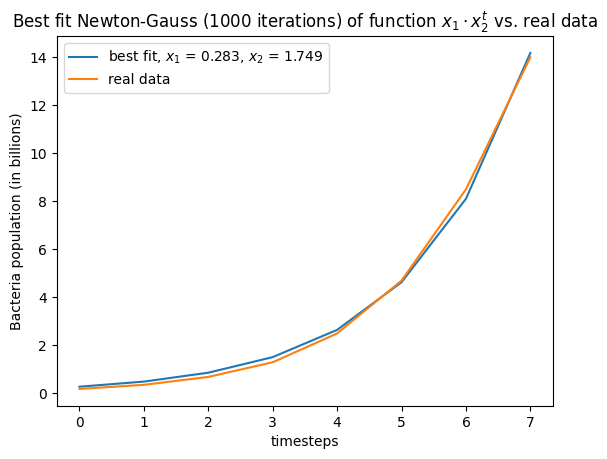

In [141]:
# plotting results non log

best_fit_estimate = [func(t, coefficients) for t in range(len(data))]
plt.title(r'Best fit Newton-Gauss (1000 iterations) of function $x_{1} \cdot x_{2}^{t}$ vs. real data')
plt.plot(best_fit_estimate, label = f'best fit, $x_{1}$ = {np.round(coefficients[0],3)}, $x_{2}$ = {np.round(coefficients[1],3)}')
plt.plot(data, label = 'real data')
plt.legend()
plt.ylabel('Bacteria population (in billions)')
plt.xlabel('timesteps')
plt.show()

# (b)
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( y_i - f_i(x)) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| Y - F(x) \|_2^2
$$
with $F_i(x) = \frac{1}{\sigma_i} f(x)$  , $Y_i = \frac{1}{\sigma_i} y_i$. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0$ and $r$. 

Plot the datapoints and the curve fitted to the data again in a semilogarithmic plot.

Compare the residuals, i.e. the values of $y_i - f_i(x)$) obtained in (a) and (b), and discuss the differences between the results of the weighted and the unweighted optimization.


In [142]:
print(residuals)
sigma_scale(residuals,0.05)

[-0.09277059 -0.13467968 -0.17539406 -0.21392287 -0.14846104  0.06677461
  0.39462213 -0.17957145]
element -0.09277058762327645
sigma_factor*element -0.0046385293811638225
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element -0.13467968212263787
sigma_factor*element -0.006733984106131893
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element -0.1753940636533542
sigma_factor*element -0.00876970318266771
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element -0.21392287266166976
sigma_factor*element -0.010696143633083488
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element -0.14846104292927098
sigma_factor*element -0.007423052146463549
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 0.066774607492464
sigma_factor*element 0.0033387303746232003
element/(sigma_factor*element) 19.999999999999996
data_rescaled[index] 19.999999999999996
element 0.3946221258992857
sigma_factor*element 0.019731106294964287
elem

array([20., 20., 20., 20., 20., 20., 20., 20.])

In [143]:
# your code here

def sigma_scale(data, sigma_factor):
    data_rescaled = data
    for index, element in enumerate(data):
        print('element', element)
        print('sigma_factor*element', sigma_factor*element)
        print('element/(sigma_factor*element)', element/(sigma_factor*element))
        data_rescaled[index] = element/(sigma_factor*element)
        print('data_rescaled[index]', data_rescaled[index])
    return data_rescaled

def residual_sigma_scaled(xk, func, data_to_fit, sigma_factor):
    """Returns a residual vector of size len(data), based on a tuple of coefficients xk, a function func and a vector data_to_fit"""
    # create an empty residual vector of same size of data to fit
    residuals = np.zeros_like(data_to_fit)
    for index, value in enumerate(data_to_fit):
        residuals[index] = value - func(index, xk)

    weight_vector = sigma_scale(data, sigma_factor)

    
    scaled_residuals = weight_vector * residuals

    return scaled_residuals

# define Gauss-Newton here
def GaussNewtonSigmaScaled(x0:tuple,  K:int, data_to_fit, sigma_factor) -> tuple:
    """performs a Gauss Newton best fit and returns coefficients and residual vector"""
    xk = x0
    x_1_init, x_2_init = xk

    # perform iterations and find best fit xk
    for iter in range(K):

        # using QR solve for better numerical stability as mentioned in heath
        Q, R = np.linalg.qr((Jacobian(xk, data_to_fit)))
        sk = np.linalg.solve(R, np.dot(Q.T, -residual_sigma_scaled(xk, func, data_to_fit, sigma_factor)))
        xk = xk + sk

    return xk, residual_sigma_scaled(xk, func, data_to_fit, sigma_factor)

In [144]:
# make definitions for bacterial model and run Gauss-Newton here

# parameters
x0 = [0.19, 1.89]
K = 1000
data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14])

# getting coefficients and residuals
coefficients, residuals = GaussNewtonSigmaScaled(x0, K , data, 0.05)
print('coefficients: ', coefficients)
print('residuals: ', residuals)


element 0.19
sigma_factor*element 0.009500000000000001
element/(sigma_factor*element) 19.999999999999996
data_rescaled[index] 19.999999999999996
element 0.36
sigma_factor*element 0.018
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 0.69
sigma_factor*element 0.034499999999999996
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 1.3
sigma_factor*element 0.065
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 2.5
sigma_factor*element 0.125
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 4.7
sigma_factor*element 0.23500000000000001
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 8.5
sigma_factor*element 0.42500000000000004
element/(sigma_factor*element) 19.999999999999996
data_rescaled[index] 19.999999999999996
element 14.0
sigma_factor*element 0.7000000000000001
element/(sigma_factor*element) 19.999999999999996
data_rescaled[index] 19.999999999999996
element 19.999999999999996
sigma_

C:\Users\nitai\AppData\Local\Temp\ipykernel_29792\301455215.py:23: RuntimeWarning: overflow encountered in multiply
  scaled_residuals = weight_vector * residuals


element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0
element 20.0
sigma_factor*element 1.0
element/(sigma_factor*element) 20.0
data_rescaled[index] 20.0


# Exercise 2 (3 points)
A triangle has been measured. The measurements, a vector $x \in \mathbb{R}^6$, are as follows:
$$\begin{array}{c|c|c|c|c|c}
x_1 = \alpha 
& x_2 = \beta
& x_3 = \gamma
& x_4 = a
& x_5 = b
& x_6 = c \\ \hline
67.5^{\large\circ}
& 52^{\large\circ}
& 60^{\large\circ}
& 172 \text{m}
& 146 \text{m}
& 165 \text{m}
\end{array} .
$$
Here $\alpha, \beta, \gamma$ are the angles opposite the sides with length $a$, $b$, $c$, respectively.
The measurements $x$ have errors. We would like to correct them so that the new values $\tilde{x} = x + h$ are consistent quantities of a triangle. The have to satisfy:
$$ \tag{*}
\begin{array}{ccc}
\text{Sum of angles:} 
& \;\;\;\;\; & 
\tilde{x}_1 + \tilde{x}_2 + \tilde{x}_3 = 180^{\large\circ}
\\
\text{Sine theorem:}
&&
\tilde{x}_4 \sin(\tilde{x}_2) - \tilde{x}_5 \sin(\tilde{x}_1) = 0
\\
&&
\tilde{x}_5 \sin(\tilde{x}_3) - \tilde{x}_6 \sin(\tilde{x}_2) = 0 .
\end{array}$$


## (a)
Solve the constrained least squares problem $\min_x \| h \|_2^2$ subject to the constraints given by (*).

Use `scipy.optimize.minimize`.

Hint: Don't forget to work in radians!

Check that for the new values also e.g. the cosine theorem $c^2 = a^2 + b^2 - 2 ab \cos(\gamma)$ holds.

In [189]:
# Define measurement of triangle
x = np.array([radians(67.5),radians(52),radians(60),172,146,165]) 

# Make innitial guess of the correction term h
h0 = np.random.normal(0, 0.5, 6) 

# Define angle sum and sine theorem constraints as functions that must equate to 0
constraints = ({'type': 'eq', 'fun': lambda h: x[0]+h[0] + x[1]+h[1] + x[2]+h[2] - np.pi },
        {'type': 'eq', 'fun': lambda h: (x[3]+h[3])*np.sin(x[1]+h[1]) - (x[4]+h[4])*np.sin(x[0]+h[0]) },
        {'type': 'eq', 'fun': lambda h: (x[4]+h[4])*np.sin(x[2]+h[2]) - (x[5]+h[5])*np.sin(x[1]+h[1]) })

# Define the function to minimize
function = lambda h: np.linalg.norm(h)**2

# Minimize h with the constraints
optimization = sp.optimize.minimize(function, h0, method='SLSQP', constraints=constraints)

# Retrieve optimized h value
h = optimization.x

# Add h to initial guess to get final triangle
x_hat = x + h

# Define the validation functions
angle_sum_verification = lambda x_hat: np.isclose(x_hat[0]+x_hat[1]+x_hat[2],np.pi)
sine_theorem_verification = lambda x_hat: np.isclose(x_hat[3]*np.sin(x_hat[1]) + x_hat[4]*np.sin(x_hat[2]), x_hat[4]*np.sin(x_hat[0]) + x_hat[5]*np.sin(x_hat[1]))
cosine_theorem_verification = lambda x_hat: np.isclose(x_hat[5]**2, + x_hat[3]**2 + x_hat[4]**2 - 2*x_hat[3]*x_hat[4]*np.cos(x_hat[2]))

# Print results
print('x:',x)
print('h:',h)
print('x_hat',x_hat)
print()
print('Angle sum verification:',angle_sum_verification(x_hat))
print('Sine theorem verification:',sine_theorem_verification(x_hat))
print('Cosine theorem verification:',cosine_theorem_verification(x_hat))


x: [  1.17809725   0.90757121   1.04719755 172.         146.
 165.        ]
h: [-0.01169222 -0.0123118   0.03273067  0.00022237  0.0001075  -0.00035013]
x_hat [  1.16640503   0.89525941   1.07992822 172.00022237 146.0001075
 164.99964987]

Angle sum verification: True
Sine theorem verification: True
Cosine theorem verification: True


The above result shows that the resulting $h$ is valid, as the resulting $\tilde{x}$ value not only satisfies the angle sum and sine theorem, but also the cosine theorem (and thus $\tilde{x}$ can be safely determined to correspond to a triangle). This showcases the usefulness of constrains to enhance minimization problems. On the other side, the $h$ values, while valid, are noticeably small for the sides of the triangle, with most transformation taking place instead on $\alpha$, $\beta$ and $\gamma$. This is an expected result because (1) for our particular measurements the contribution of the lengths makes up most of the value of the function, thus overshadowing the angle contributions during minimization under our constraints and (2) even a change in the angles alone would be sufficient to make the measurements comply with both triangle constraints. This in turn highlights that the angle sum and sine theorem constraints are enough to ensure that the minimization algorithm produces a triangle despite the minimization process barely allowing the update of its lengths because of our choice of function.

## (b)
You will notice that the corrections will be made mainly to the angles and much less to the lengths of the sides of the triangle. This is because the measurements have not the same absolute errors. While the error in last digit of the sides is about 1, the errors in radians of the angles are about 0.01. Repeat your computation by taking in account with appropriate weighting the difference in measurement errors. Minimize not simply $\| h \|_2^2$ but
$$
  \left\| \begin{bmatrix} 100 h_1 \\ 100 h_2 \\ 100 h_3 \\ h_4 \\ h_5 \\ h_6 \end{bmatrix} \right\|_2^2.$$

In [190]:
# Update the optimization function
function_improved = lambda h: np.linalg.norm(100*h[0]+100*h[1]+100*h[2]+h[3]+h[4]+h[5])**2

# Minimize h with the improved function
optimization = sp.optimize.minimize(function_improved, h0, method='SLSQP', constraints=constraints)
h = optimization.x
x_hat = x + h

# Print results
print('x:',x)
print('h:',h)
print('x_hat',x_hat)
print()
print('Angle sum verification:',angle_sum_verification(x_hat))
print('Sine theorem verification:',sine_theorem_verification(x_hat))
print('Cosine theorem verification:',cosine_theorem_verification(x_hat))

x: [  1.17809725   0.90757121   1.04719755 172.         146.
 165.        ]
h: [-0.01544029 -0.01027465  0.03444159 -0.62672874 -0.05978751 -0.18614841]
x_hat [  1.16265695   0.89729656   1.08163914 171.37327126 145.94021249
 164.81385159]

Angle sum verification: True
Sine theorem verification: True
Cosine theorem verification: True


Once again, the resulting $h$ is valid as the new $\tilde{x}$ satisfies all the triangle properties, including the cosine theorem. However, the correction values of $h$ now not only update the angles of the triangle significantly but also its sides. This is a direct result of the weighting introduced to the function we are minimizing, as it now allows all parameters of the system to have a roughly evenly impact on its output. This is the resulting triangle:

In [201]:
print('α',(180/np.pi)*x_hat[0],'[º]')
print('β',(180/np.pi)*x_hat[1],'[º]')
print('γ',(180/np.pi)*x_hat[2],'[º]')
print()
print('a',x_hat[3],'[m]')
print('b',x_hat[4],'[m]')
print('c',x_hat[5],'[m]')


α 66.61533644106662 [º]
β 51.411305845146444 [º]
γ 61.97335771378693 [º]

a 171.37327125710914 [m]
b 145.94021248564377 [m]
c 164.813851587431 [m]
